# PHYS 386 HW3

___

## (1) Read Cousins, “Why isn’t every physicist a Bayesian?”   Answer the following questions from the paper with just a sentence or some bullet points each.  We will discuss these in class next week. 

### A. Section IV: What are some of the issues in incorporating a physical boundary into a confidence interval? (Note: this paper was written 4 years before Feldman-Cousins).

> - In the Bayesian framework, the credible intervals depend on the prior distribution. For example, the choice of which quantity should have a uniformly distributed prior for values greater than zero ($m, m^2$ or $\ln{m}$, etc.) changes the estimated upper limit. 
> - In the classical framework, there is no way to incorporate physical boundaries as priors, so one can get unphysical upper limits (such as the negative mass upper limits in neutrino experiments).

### B. Section V: What are the criteria for construction of a classical confidence interval?

> For the construction of a classical central confidence interval $(\mu_1, \mu_2)$, one must find $\mu_1$ s.t. 
>
> $$P(n\geq n_0 | \mu_1)=\frac{1}{2}(1-\mathrm{C.L.}),$$
>
> and $\mu_2$ s.t. 
>
> $$P(n\leq n_0 | \mu_2)=\frac{1}{2}(1-\mathrm{C.L.}),$$
>
> where $n_0$ is the number of events observed and $\mathrm{C.L.}$ is the confidence level. One can also construct an approximate $68\%\ \mathrm{C.L.}$ confidence interval by finding $\mu_1, \mu_2$ s.t. the log likelihood function decreases by 1/2, i.e., 
> 
> $$\ln{\mathcal{L}}(n_0|\mu_1) = \ln{\mathcal{L}}(n_0|\mu_2) = \ln{\mathcal{L}}(n_0|\hat{\mu}) - \frac{1}{2},$$
> 
> where $\hat{\mu}=n_0$ is the maximum likelihood estimator of $\mu_t$.

### C. Section V: What are the criteria for the construction of a Bayesian confidence (credible) interval?

> For the construction of a Bayesian credible interval, one needs to construct the posterior P.D.F. from the likelihood function and Bayes theorem: 
>
> $$P(\mu_t | n_0) = \frac{\mathcal{L}(n_0 | \mu_t) P(\mu_t)}{\int_0^{\infty} \mathcal{L}(n_0 | \mu_t)P(\mu_t)\, \mathrm{d} \mu_t}.$$
>
> When there is no prior knowledge on $\mu_t$, one must choose an *uninformative* prior P.D.F. such as a uniform distribution. The problem with this approach, as stated in part A., is that it is not trivial to choose for what function of $\mu_t$ one should assume a uniform distribution, since this choice affects the credible intervals. After choosing a prior, the Bayesian credible interval $(\mu_1, \mu_2)$ can be calculated by the criterion
>
> $$\int_{\mu_1}^{\mu_2} P(\mu_t | n_0)\, \mathrm{d}\mu_t = \mathrm{C.L.},$$
>
> where $\mathrm{C.L.}$ is the confidence level of the credible interval, and an additional criterion which depends on the kind of credible interval one wants. For a central interval, the additional criterion is given by:
>
> $$\int_0^{\mu_1} P(\mu_t|n_0)\, \mathrm{d}\mu_t = \int_{\mu_2}^{\infty} P(\mu_t|n_0)\, \mathrm{d}\mu_t. $$
>
> For the shortest Bayesian interval, the additional criterion is that the posterior $P(\mu_t|n_0)$ for any $\mu_t$ outside the credible interval is less than $P(\mu_t|n_0)$ for all $\mu_t$ instide the credible interval. 

### D. Section V: What prior would Jeffreys suggest we use in the absence of any knowledge about the true value of our parameter, mu? What is the reasoning behind this set of priors?

> Harold Jeffreys suggests using the prior $P(\mu_t) = 1/\mu_t$ when nothing is known about $\mu_t$ because it is invariant under changes of power of the parameter being estimated, i.e., the priors $P(\mu_t) = 1/\mu_t$ and $P(\mu_t^k) = 1/\mu_t^k$ are consistent for any power $k$. Note that this is equivalent to a uniform distribution for $\ln{\mu_t}$. This prior also allows consistency between experiments measuring the same decay process with different standards for the passage of time. 

### E. What are some of the drawbacks of the classical vs. Bayesian methods for interval construction?

> - Bayesian intervals depend on the prior, and it is not clear which one to choose.
> - Some Bayesian intervals/limits fail the criterion of the frequentist coverage. 
> - In the presence of systematic Gaussian error on the sensitivity of the experiment, classical limits can lead to unacceptable results.

### F. Section VI: How might you deal with a systematic Gaussian error on top of your Poisson process? 

> - One could use a Bayesian approach to calculate a posterior P.D.F. for the sensitivity as a subsidiary measurement. 
> - One could take a fully Bayesian approach as long as it satisfies the frequentist coverage criterion.

## (2) An exercise using the chi-squared notebook.  You will be working from the exercise in “now repeat the fit using this full inverse covaraince to compute Chi-squared” pertaining to fitting A and B for our toy BAO feature including a non-trivail covariance matrix. 

### A. Use Table 1 to set the delta chi-squared levels correctly corresponding to 1, 2, and 3 sigma..  Note these levels and show the resulting contours.

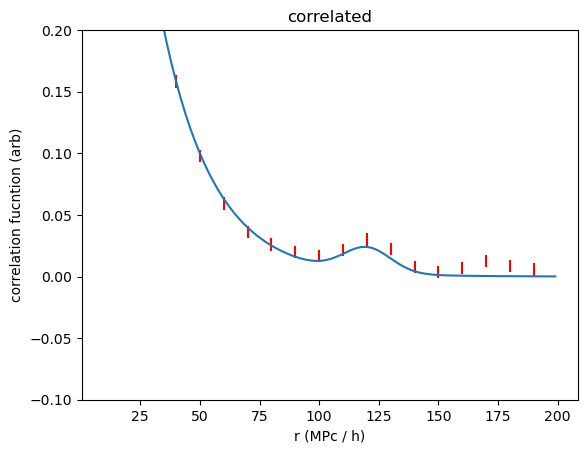

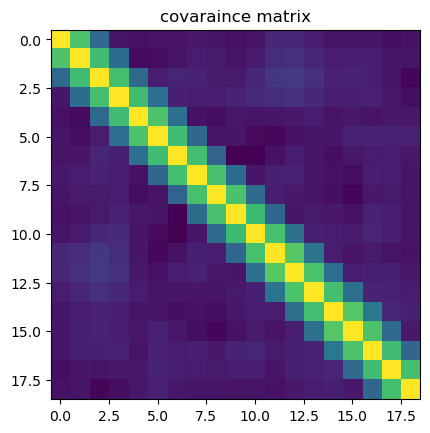

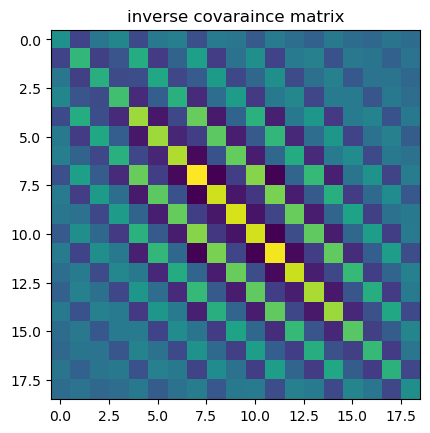

In [28]:
## make a toy modle for the galaxy-galaxy corerlation funciton

import numpy as np
import matplotlib.pyplot as plt

r = np.arange(190) + 10
gal_gal_cor_empricial_theory = 1*(1/10.)**(r/50.)+ 0.02*np.exp(-0.5*((r-120)/10.)**2)
plt.plot(r,gal_gal_cor_empricial_theory)
plt.xlabel("r (MPc / h)")
plt.ylabel("correlation fucntion (arb)")


## make simulated data with error bars, no correlation
bin_width = 10. # the sampling of the measurement
N_pts_in_bin  = 1000 # numper of samples used to compute the mean and rms in each bin
N_data_pts = int(190 / bin_width)  ## number of data points for the plot
sigma_corr = 0.005*np.sqrt(N_pts_in_bin)  ## uncertainty in the correlatoin fucntion
## new line
correlatipon_fator = 0.9  ###<<<<<<  nearest neighbor correlation factor <<<<<<<<<<<<<<<<<

## store all the data for future use
Raw_data = np.zeros([N_data_pts,N_pts_in_bin])
Binned_r = np.zeros(N_data_pts)
Binned_mean = np.zeros(N_data_pts)
Binned_error = np.zeros(N_data_pts)


## set up arrays so we can create nearesst neighbor correlation in the loop below
random_in_bin_last = np.random.randn(N_pts_in_bin)
random_in_bin = np.random.randn(N_pts_in_bin)
random_in_bin_next = np.random.randn(N_pts_in_bin)


    
i = 0
while (i < N_data_pts):
    r_bin  = bin_width*(i+1)
    theory_mean = gal_gal_cor_empricial_theory[(np.where(r == r_bin))[0] ]
    ## inbclude correlations
    random_new = np.random.randn(N_pts_in_bin)#*sigma_corr + theory_mean
    
    ## update the random arrays
    random_in_bin_last = random_in_bin
    random_in_bin = random_in_bin_next
    random_in_bin_next = random_new
      
    ## compute the data point including correlation!!!!!!!! <<<<<<<<<<<<<<<<
    data_in_bin = + correlatipon_fator*random_in_bin_next + random_in_bin + correlatipon_fator*random_in_bin_last
    data_in_bin /= np.std(data_in_bin)  ## keep the standard devaition to be 1
    data_in_bin = data_in_bin*sigma_corr + theory_mean
        
    mean_pt = np.mean(data_in_bin)
    error_pt = np.std(data_in_bin) / np.sqrt(N_pts_in_bin - 1.) ## this is the error on the mean
    plt.errorbar(r_bin,mean_pt,error_pt,marker=',',mec='red',mfc='red',c="red")
  
    ## store the data for use below in a fit
    Raw_data[i,:] = data_in_bin
    Binned_r[i] = r_bin
    Binned_mean[i] = mean_pt
    Binned_error[i] = error_pt

    ## iterate
    i+=1

plt.title("correlated")
plt.ylim(-.1,.2)
plt.show()

###### define a fitting function. 
#followiong the disccion above we generate a fitting funciton which takes three varibales: 
    ## A the amplitude of the power law
    ## B the ampltude of the gaussin feature represetning the BAO bump
    ## r the central values of r at which the data are sampled
def fit_funtion(A,B,r):
    return( A*(1/10.)**(r/50.)+ B*np.exp(-0.5*((r-120)/10.)**2))  ## the funciton we used to 


##### define a chi_sqared funmciton
## we will use the vector version and prepare for the case where correlations are present
def chi_squared(binned_r,binned_mean, invCov,A,B):
    model = fit_funtion(A,B,binned_r)
    data_minus_model = binned_mean - model
    chi_sq = np.dot( np.transpose(data_minus_model) , np.matmul(invCov, data_minus_model) )
    return(chi_sq)

## compute the correlation matrix 

### NOTE: the following quantities describing our simualted data were stored in the prvious cell:
    #Raw_data -- the data whcih go into each bin on the plot, these include correlations
    #Binned_r  -- the centra r of each bin
    #Binned_mean  -- the mean in each bin
    #Binned_error  -- the variance on the mean of each data point.
    
    
cov = np.zeros([np.size(Binned_r),np.size(Binned_r)])  ## make a matrix to hold the covariance


## compute the covarinace from the Raw data in each bin
i = 0
while (i < np.size(Binned_r)):
    j = 0
    while (j < np.size(Binned_r)):
        di = Raw_data[i,:]-np.mean(Raw_data[i,:])
        dj = Raw_data[j,:]-np.mean(Raw_data[j,:])
        cov[i,j] = ( np.sum(di*dj) / (N_pts_in_bin**2))   ## note how easy this is.  The N_pts_in_bin^2 factor is so we get the covariance on the mean
        j+=1
    i+=1


## plot the covaraince matrix.
plt.imshow(cov)
plt.title("covaraince matrix")
plt.show()

# inverse cov matrix

inv_cov = np.linalg.inv(cov)
plt.imshow(inv_cov)
plt.title("inverse covaraince matrix")
plt.show()

[1.001] [0.021] 14.308289778835336 19


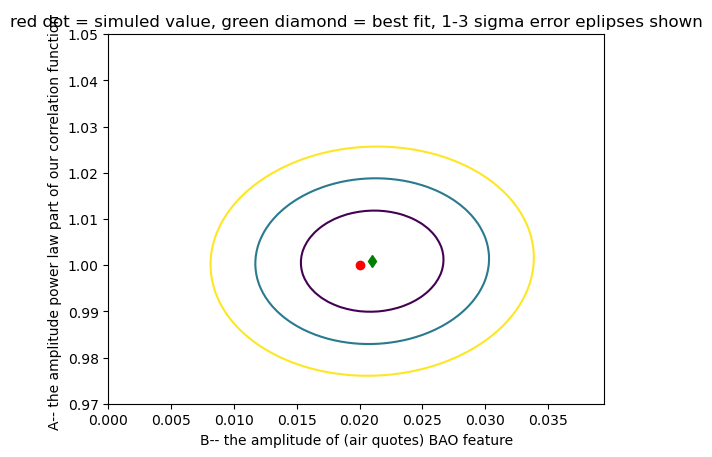

In [30]:
# 1, 2 and 3 sigma delta chi-squared levels for 2 parameters:

sigma_1 = 2.30
sigma_2 = 6.17
sigma_3 = 11.8

## define a grid in A and B and compute a grid search.

A_points = np.arange(0.97,1.05,.001)
B_points = np.arange(0.0,.04,.0005)
N_pts_A = np.size(A_points)
N_pts_B = np.size(B_points)
chi_sq_map = np.zeros([N_pts_A,N_pts_B])

## compute chi_squared for each point
i = 0
while (i < N_pts_A):
    j = 0
    while (j < N_pts_B):
        chi_sq_map[i,j] = chi_squared(Binned_r,Binned_mean, inv_cov,A_points[i],B_points[j])
        j+=1
    i+=1
    
delta_chi_sq_map = chi_sq_map - np.min(chi_sq_map)

######
### make a plot of the 1,2,3 sigma error contours on the fit, 
### show the "truth" from the simulations, and 
### show the best fit.

## make a plot of chi_sq
delta_chi_sq_map = chi_sq_map - np.min(chi_sq_map)
plt.contour(B_points,A_points,delta_chi_sq_map,levels=np.array([sigma_1, sigma_2, sigma_3]))

## plot the best fit
pos_min = np.where(chi_sq_map == np.min(chi_sq_map))
plt.plot(B_points[pos_min[1]],A_points[pos_min[0]],'gd')
print(A_points[pos_min[0]],B_points[pos_min[1]],np.min(chi_sq_map),np.size(Binned_r))

## plot the "true" parmaters (eg what we used in the simulation)
plt.plot(np.array(0.02),np.array(1),'ro')
plt.xlabel("B-- the amplitude of (air quotes) BAO feature")
plt.ylabel("A-- the amplitude power law part of our correlation function ")
plt.title("red dot = simuled value, green diamond = best fit, 1-3 sigma error eplipses shown")

plt.show()


### B. Generate a set of 100 simulations and store the best fit chi-squared values in a text file.  Plot these as dots on your contour plot.   Does this distribution make sense?

### C. Use 2log(L) = chi_sq to convert your chi-squared to a probability distribution.  Normalize this probability distribution to make its integral 1.  Now choose a level L0 such that the integral of L with (L>L0) = 68%.   Draw this contour on your plot.